# New Section

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('breast_cancer_data.csv', sep=',', header = 0)

In [5]:
# import matplotlib.pyplot as plt

# # Set up a 3x10 grid of subplots
# fig, axes = plt.subplots(3, 10, figsize=(20, 20))
# axes = axes.flatten()  # Flatten to easily index

# # Plot histograms for each column
# for j, col in enumerate(df.columns):
#   if j<len(df.columns)-2:
#     axes[j].hist(df[col], bins=20)
#     axes[j].set_title(col)
#     axes[j].tick_params(labelsize=8)

# # Hide any unused subplots
# for k in range(j+1, len(axes)):
#     axes[k].axis('off')

# plt.tight_layout()
# plt.show()


In [6]:
target0 = df['target_name'][0]
target1 = df['target_name'][1]

In [7]:
y = df['target']
X = df.drop(columns=['target', 'target_name'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)

In [9]:
model_lbls = ['dt',
              'rf',
              'knn',
              'ln',
              'adb',
              'nb'
              ]

models = {
    'dt': {
        'name': 'Decision Tree',
        'estimator': DecisionTreeClassifier(),
        'params': {'criterion': ['gini', 'entropy'], 'max_depth': [*range(5,11)], 'class_weight': ['balanced', None]}
    },
    'rf': {
        'name': 'Random Forest',
        'estimator': RandomForestClassifier(),
        'params': {'n_estimators': np.arange(10,50,10), 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', None]}
    },
    'adb': {
        'name': 'AdaBoost',
        'estimator': AdaBoostClassifier(),
        'params': {'n_estimators': np.arange(10,110,10), 'learning_rate': np.arange(0.5,1.5,0.1)}
    },
    'knn': {
        'name':'K Nearset Neighbour',
        'estimator': KNeighborsClassifier(),
        'params': {'n_neighbors': [*range(5,11)], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}
    },
    'ln': {
        'name': 'Linear Perceptron',
        'estimator': Perceptron(),
        'params': {'class_weight': ['balanced', None], 'early_stopping': [True, False]}
    },
    'nb': {
        'name': 'Gaussian Naive Bayes',
        'estimator': GaussianNB(),
        'params': [{'var_smoothing': [10**exp for exp in range(-3,-13,-1)]}]
    }

}

In [10]:
scoring = ['accuracy', 'recall_macro', 'f1_macro', 'precision_macro']

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

clfs = []
results = pd.DataFrame(columns=['score',
                                'model',
                                'best_params',
                                'accuracy',
                                'f1_macro',
                                'recall_macro',
                                'precision_macro'])


In [11]:
for score in scoring:
  for lbl in model_lbls:
    clf = GridSearchCV(models[lbl]['estimator'], param_grid=models[lbl]['params'], cv=skf, scoring=score)
    clf.fit(X_train,y_train)
    clfs.append(clf)
    y_pred = clf.predict(X_test)
    cr = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
    results.loc[len(results)] = [score,
                                 models[lbl]['name'],
                                 clf.best_params_,
                                 cr['accuracy'],
                                 cr['macro avg']['precision'],
                                 cr['macro avg']['recall'],
                                 cr['macro avg']['f1-score']]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
for score in scoring:
  print(f'**********The Results For Scoring: {score}**********')
  display(results[results['score']==score].sort_values(by=['accuracy'], ascending=True).head())
  print('\n\n\n')

**********The Results For Scoring: accuracy**********


,score,model,best_params,accuracy,f1_macro,recall_macro,precision_macro
0,accuracy,Decision Tree,"{'class_weight': None, 'criterion': 'gini', 'm...",0.947368,0.943990,0.943990,0.943990
3,accuracy,Linear Perceptron,"{'class_weight': None, 'early_stopping': False}",0.947368,0.941063,0.948575,0.944481
2,accuracy,K Nearset Neighbour,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.956140,0.967105,0.941860,0.952129
1,accuracy,Random Forest,"{'class_weight': None, 'criterion': 'entropy',...",0.964912,0.967257,0.958074,0.962302
4,accuracy,AdaBoost,"{'learning_rate': 1.2999999999999998, 'n_estim...",0.964912,0.962660,0.962660,0.962660






**********The Results For Scoring: recall_macro**********


,score,model,best_params,accuracy,f1_macro,recall_macro,precision_macro
6,recall_macro,Decision Tree,"{'class_weight': None, 'criterion': 'gini', 'm...",0.938596,0.936508,0.932362,0.934348
9,recall_macro,Linear Perceptron,"{'class_weight': None, 'early_stopping': False}",0.947368,0.941063,0.948575,0.944481
8,recall_macro,K Nearset Neighbour,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.956140,0.967105,0.941860,0.952129
7,recall_macro,Random Forest,"{'class_weight': None, 'criterion': 'gini', 'n...",0.964912,0.967257,0.958074,0.962302
10,recall_macro,AdaBoost,"{'learning_rate': 1.4, 'n_estimators': 70}",0.973684,0.974206,0.969702,0.971863






**********The Results For Scoring: f1_macro**********


,score,model,best_params,accuracy,f1_macro,recall_macro,precision_macro
12,f1_macro,Decision Tree,"{'class_weight': None, 'criterion': 'gini', 'm...",0.947368,0.943990,0.943990,0.943990
15,f1_macro,Linear Perceptron,"{'class_weight': None, 'early_stopping': False}",0.947368,0.941063,0.948575,0.944481
14,f1_macro,K Nearset Neighbour,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.956140,0.967105,0.941860,0.952129
13,f1_macro,Random Forest,"{'class_weight': 'balanced', 'criterion': 'gin...",0.964912,0.962660,0.962660,0.962660
16,f1_macro,AdaBoost,"{'learning_rate': 1.2999999999999998, 'n_estim...",0.964912,0.962660,0.962660,0.962660






**********The Results For Scoring: precision_macro**********


,score,model,best_params,accuracy,f1_macro,recall_macro,precision_macro
18,precision_macro,Decision Tree,"{'class_weight': None, 'criterion': 'gini', 'm...",0.938596,0.936508,0.932362,0.934348
21,precision_macro,Linear Perceptron,"{'class_weight': None, 'early_stopping': False}",0.947368,0.941063,0.948575,0.944481
19,precision_macro,Random Forest,"{'class_weight': None, 'criterion': 'entropy',...",0.964912,0.967257,0.958074,0.962302
22,precision_macro,AdaBoost,"{'learning_rate': 1.2999999999999998, 'n_estim...",0.964912,0.962660,0.962660,0.962660
20,precision_macro,K Nearset Neighbour,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.973684,0.974206,0.969702,0.971863


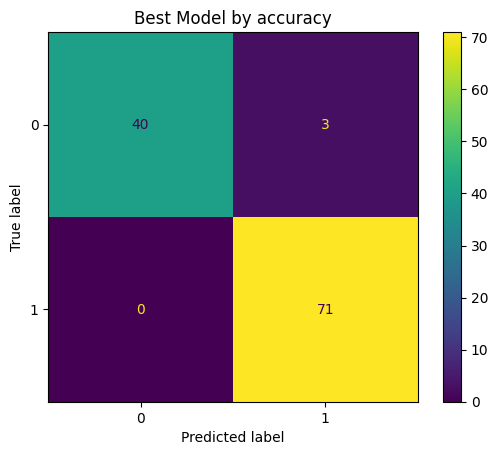

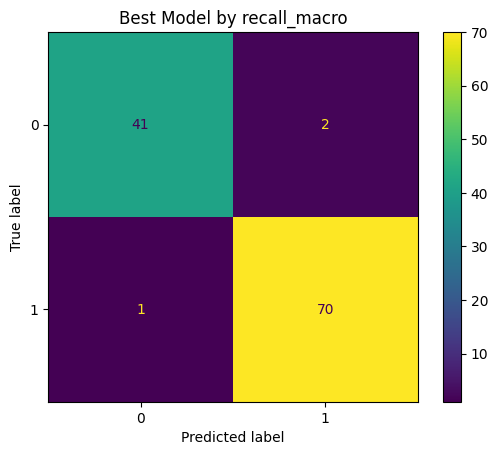

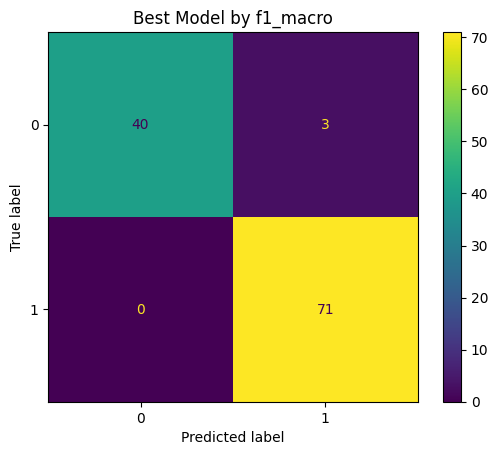

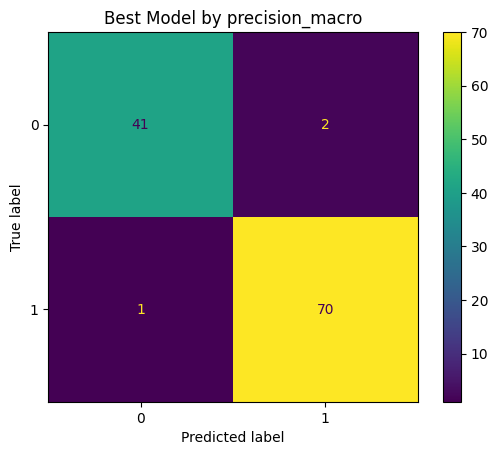

In [13]:
for score in scoring:
  best_row = results.loc[results['score'] == score , score].idxmax()
  disp = ConfusionMatrixDisplay.from_estimator(estimator=clfs[best_row], X=X_test, y=y_test)
  disp.ax_.set_title(f"Best Model by {score}")
  plt.show()